# Tutorial 02: Exploratory Model Analysis

*Authors: Zach del Rosario*

---

This is a tutorial on using grama to do *exploratory model analysis*; to evaluate the model to generate data, then use that data to understand the model.

**Learning Goals**: By completing this notebook, you will learn:
1. How to use the verbs `gr.eval_monte_carlo` and `gr.eval_sinews`
1. How to use `gr.plot_auto`
1. Common grama arguments and defaults

**Prerequisites**:
- Familiarity with the Python programming language
- [Tutorial 01: Introduction]()

**Table of Contents**:
1. [Initialize](#s1)
2. [Monte Carlo Simulation](#s2)
3. [Sweeps](#s3)

## Initialize <a id="s1"></a>

In order to perform model analysis, we first need to construct the model. For this exercise we'll use a pre-built model: the cantilever beam model.

#### __Q1: Initialize grama__
Import grama and the cantilever beam model.

*Hint*: We initialized grama in the previous notebook; feel free to copy and paste from there.

In [1]:
###
# TASK: Set up grama
# TODO: Import grama, make the cantilever_beam model
###

# task-begin
# TODO: Import grama
# TODO: Assign the cantilever_beam model to `md`
# task-end

# solution-begin
import grama as gr
from grama.models import make_cantilever_beam
md = make_cantilever_beam()
# solution-end

# -- NO NEED TO MODIFY BELOW ----
md.printpretty()


model: Cantilever Beam

  inputs:
    var_det:
      t: [2, 4]
      w: [2, 4]
    var_rand:
      H: (+1) norm, {'loc': 500.0, 'scale': 100.0}
      V: (+1) norm, {'loc': 1000.0, 'scale': 100.0}
      E: (+0) norm, {'loc': 29000000.0, 'scale': 1450000.0}
      Y: (-1) norm, {'loc': 40000.0, 'scale': 2000.0}
    copula:
        Independence copula
  functions:
    cross-sectional area: ['w', 't'] -> ['c_area']
    limit state: stress: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_stress']
    limit state: displacement: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_disp']


## Monte Carlo Simulation <a id="s2"></a>

---

#### __Q2: Monte Carlo__
Perform a Monte Carlo simulation on model `md` with `gr.eval_monte_carlo`. Draw `100` samples, and use the nominal settings for the deterministic variables. Determine which arguments are required, and which are optional.

*Hint*: In Jupyter, click-selecting a function and pressing `Shift + Tab` will bring up the documentation. Use this to investigate the arguments.

In [2]:
###
# TASK: Perform a monte carlo simulation (MCS)
# TODO: Use gr.eval_monte_carlo, determine which arguments you need to set
###

# task-begin
# TODO: Perform MCS, assign results to `df_mc`
# task-end

# solution-begin
df_mc = gr.eval_monte_carlo(md, df_det="nom", n=100)
# solution-end

# -- NO NEED TO MODIFY BELOW ----
df_mc.describe()


,H,Y,V,E,t,w,g_disp,g_stress,c_area
count,100.000000,100.000000,100.000000,1.000000e+02,100.0,100.0,100.000000,100.000000,100.0
mean,507.867835,39809.394834,1001.395494,2.909419e+07,3.0,3.0,0.334134,0.156755,9.0
std,106.695026,2003.367166,109.451084,1.477000e+06,0.0,0.0,0.217850,0.100141,0.0
min,209.089500,34222.102028,647.357287,2.543839e+07,3.0,3.0,-0.253615,-0.088938,9.0
25%,431.278693,38381.672180,932.590070,2.797356e+07,3.0,3.0,0.213707,0.097595,9.0
50%,501.096847,39803.569254,985.652735,2.908596e+07,3.0,3.0,0.341739,0.148794,9.0
75%,586.476061,41208.140672,1066.984457,3.015986e+07,3.0,3.0,0.471233,0.222725,9.0
max,713.893775,44263.755116,1316.961470,3.318871e+07,3.0,3.0,0.904488,0.392538,9.0


#### __Q3: Random Seeds__
Run the code cell above a few times, and note how the results change. Then add the `seed` keyword argument with your favorite integer, and try again.

Random seeds are useful when debugging Monte Carlo results, as they ensure the same "random" results on repeated execution. As a rough rule of thumb you should systematically use multiple seeds when testing algorithms, but fix one seed when studying a model.

#### __Q4: Skip evaluation__
Modify your code above, and use the `skip` keyword to skip evaluating the functions. Take the results of `gr.eval_monte_carlo` and pass them to `gr.plot_auto`.


eval_monte_carlo() is rounding n...
Estimated runtime for design with model (Cantilever Beam):
  0.000503 sec
Calling plot_scattermat....


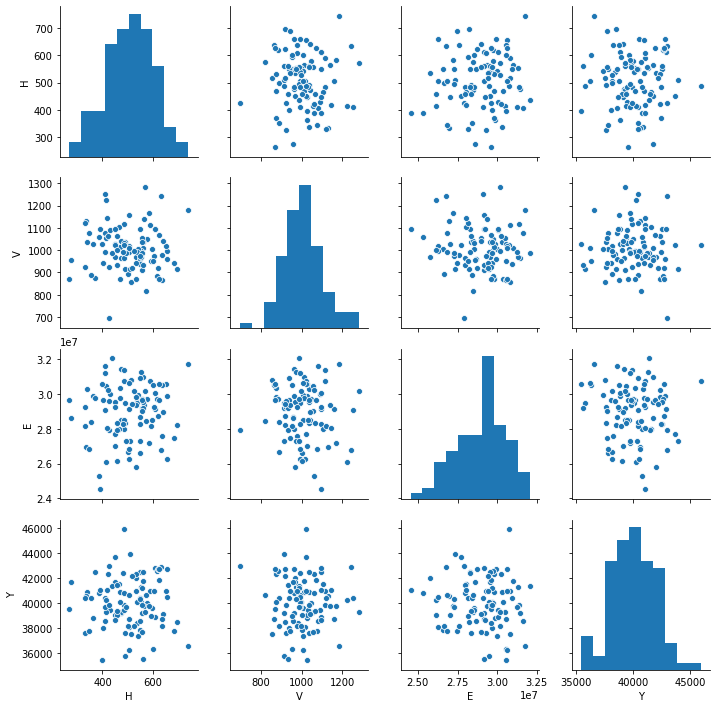

In [3]:
###
# TASK: Skip evaluation
# TODO: Use gr.eval_monte_carlo with the skip keyword
###

# task-begin
# TODO: Perform MCS with skipped evaluation, assign results to `df_skip`
# task-end
# solution-begin
df_skip = gr.eval_monte_carlo(md, n=1e2, df_det="nom", seed=101, skip=True)
# solution-end

gr.plot_auto(df_skip)


Using the autoplotter with skipped evaluation provides a visualization of the *design of experiment* (DOE), or sampling plan. Note that `gr.eval_monte_carlo` also provides an estimate of the runtime of the DOE paired with the chosen model---this is only possible when the model as runtime estimates available. When studying more expensive models, running a `skip` check first to inspect the design is often a good idea: This practice can help you catch errors before using a lot of compute resources.

#### __Q5: Autoplot evaluation__
Modify your code above to evaluate the model functions. Take the results of `gr.eval_monte_carlo` and pass them to `gr.plot_auto`. Use the same seed as you used above when setting `skip=True`. Interpret the resulting histograms.

eval_monte_carlo() is rounding n...
Calling plot_hists....


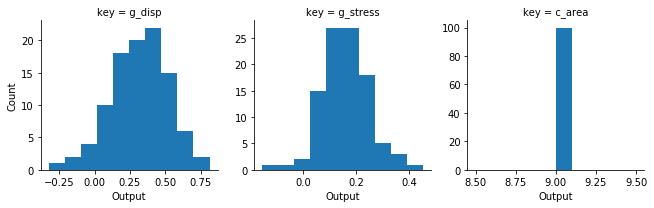

In [4]:
###
# TASK: Autoplot MCS
# TODO: Use gr.eval_monte_carlo with gr.plot_auto
###

# task-begin
# TODO: Perform MCS and visualize with gr.plot_auto
# task-end
# solution-begin
(
    md
    >> gr.ev_monte_carlo(n=1e2, df_det="nom", seed=101)
    >> gr.pt_auto()
)
# solution-end


Based on the MCS output histograms, you should be able to see that `c_area` is unaffected by the random variables, while `g_stress` and `g_disp` have a small faction of cases which lead to negative values. Since we used the same `seed` for the skipped and evaluated cases, we can guarantee the input design above matches the output results here.

## Sweeps <a id="s3"></a>
    
---    

Monte Carlo Simulation is very useful for estimating distributions and probabilities. However, sometimes we want a more qualitative understanding of the random variables' impact on model outputs. In this last section we will use *sweeps* to gain some qualitative understanding.

#### __Q6: Sinew Design__
Use the verb `gr.eval_sinews` to construct a sinew DOE. Visualize the design without evaluating. Describe the DOE in words.

*Hint*: Use the same patterns we used for `gr.eval_monte_carlo` above.

Estimated runtime for design with model (Cantilever Beam):
  0.000604 sec
Calling plot_sinew_inputs....


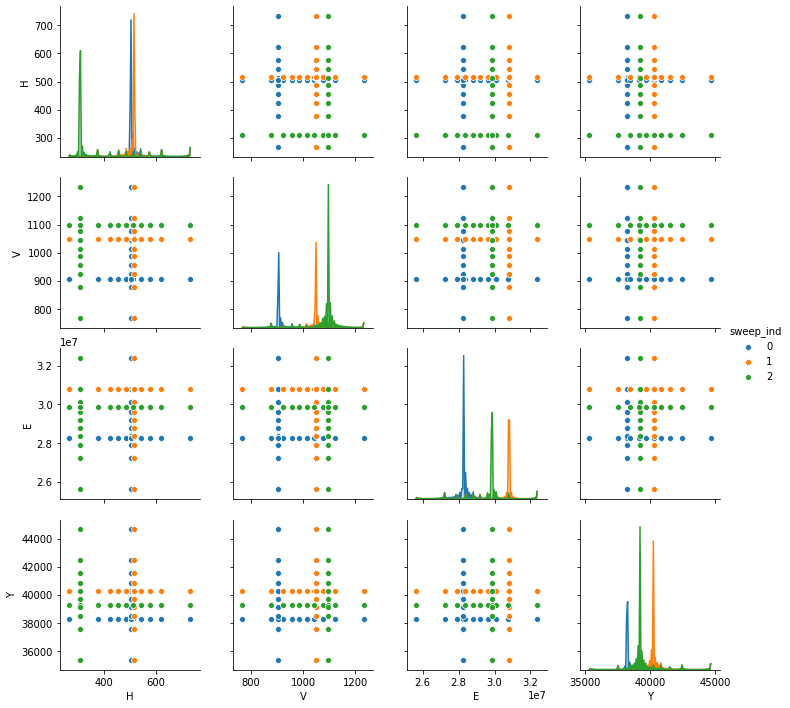

In [5]:
###
# TASK: Sinew design
# TODO: Use gr.eval_sinews to generate a design
###

# task-begin
# TODO: Generate a sinew design but do not evaluate the model functions
# task-end
# solution-begin
(
    md
    >> gr.ev_sinews(df_det="nom", skip=True, seed=101)
    >> gr.pt_auto()
)
# solution-end


#### __Q7: Sinew Study__
Use the verb `gr.eval_sinews` to evaluate the model. Visualize and interpret the results.

*Hint*: Use the same patterns we used for `gr.eval_monte_carlo` above.

Calling plot_sinew_outputs....


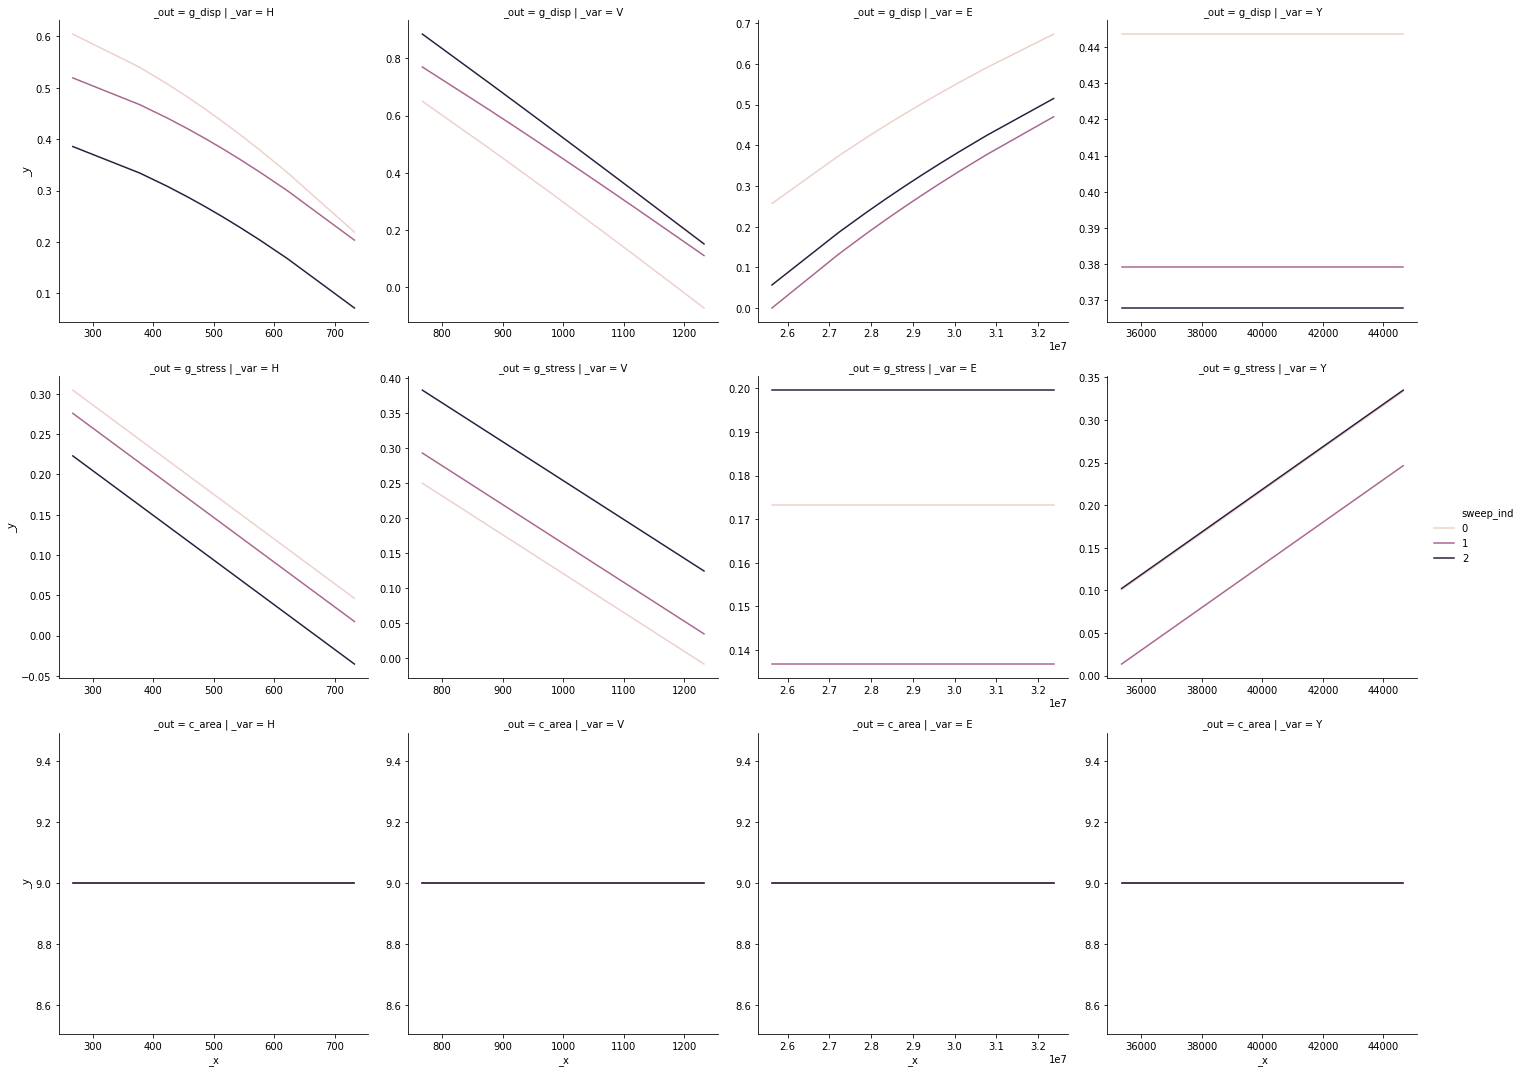

In [6]:
###
# TASK: Sinew evaluation
# TODO: Use gr.eval_sinews to evaluate the model
###

# task-begin
# TODO: Generate, evaluate, and visualize a sinew design
# task-end
# solution-begin
(
    md
    >> gr.ev_sinews(df_det="nom", seed=101)
    >> gr.pt_auto()
)
# solution-end

# Next Steps
When you are done, please take [this survey](https://docs.google.com/forms/d/e/1FAIpQLSc1OgMrImpZNMr5a9n5HUrSj1ZIu3kZj6Ooa7jTd-lGs2J9SA/viewform?entry.923399158=4088579) about the exercise.

When you're ready, move on to [Tutorial 03: Model Building](https://github.com/zdelrosario/py_grama/blob/master/tutorials/t03_building_assignment.ipynb).